<a href="https://colab.research.google.com/github/NsiriRoua/Artificial_Neural_Network/blob/main/NEURAL_NETWORKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basic Feed-forward Network**

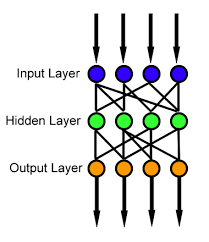



# **Let's import resources**

In [4]:
import numpy as np
im
port sklearn
import seaborn as sns 
import matplotlib.pyplot as plt



# **Activation functions**

Below we implement the ReLU function, sigmoid function, and the linear function (which simply returns its input). Let’s also combine these functions into a dictionary so we can identify them with a string argument.

In [5]:
#Activations functions
def ReLU(h):
  return np.maximum(h,0)



def sigmoid(h):
  return 1/(1+np.exp(-h))

def linear(h):
  return h


#Let's define a dictionary of activations functions
activation_dictionary={'ReLU':ReLU,'sigmoid':sigmoid,'linear':linear}

# **Loss Functions**

**Residual sum of Squares (RSS) = Squared loss**

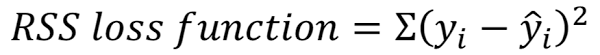

In [6]:
def RSS(y,yhat):
  return np.sum(pow(y-yhat,2))


**Binary Cross-Entropy / Log Loss**

**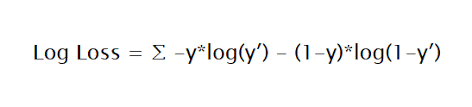**

In [7]:
def log_loss(y,yhat):
  return np.sum(-(y*np.log(yhat)+(1-y)*np.log(1-yhat)))

# **Construction**

We are going to build one hidden layer , input layer and output layer

 We are going to build a class for fittiing feed-forward networks

 we fit a network with the fit() method. This method requires training data, the number of nodes for the hidden layer, an activation function for the first and second layers’ outputs, a loss function, and some parameters for gradient descent. After storing those values, the method randomly instantiates the network’s weights: W1, c1, W2, and c2. It then passes the data through this network to instantiate the output values: h1, z1, h2, and yhat (equivalent to z2).

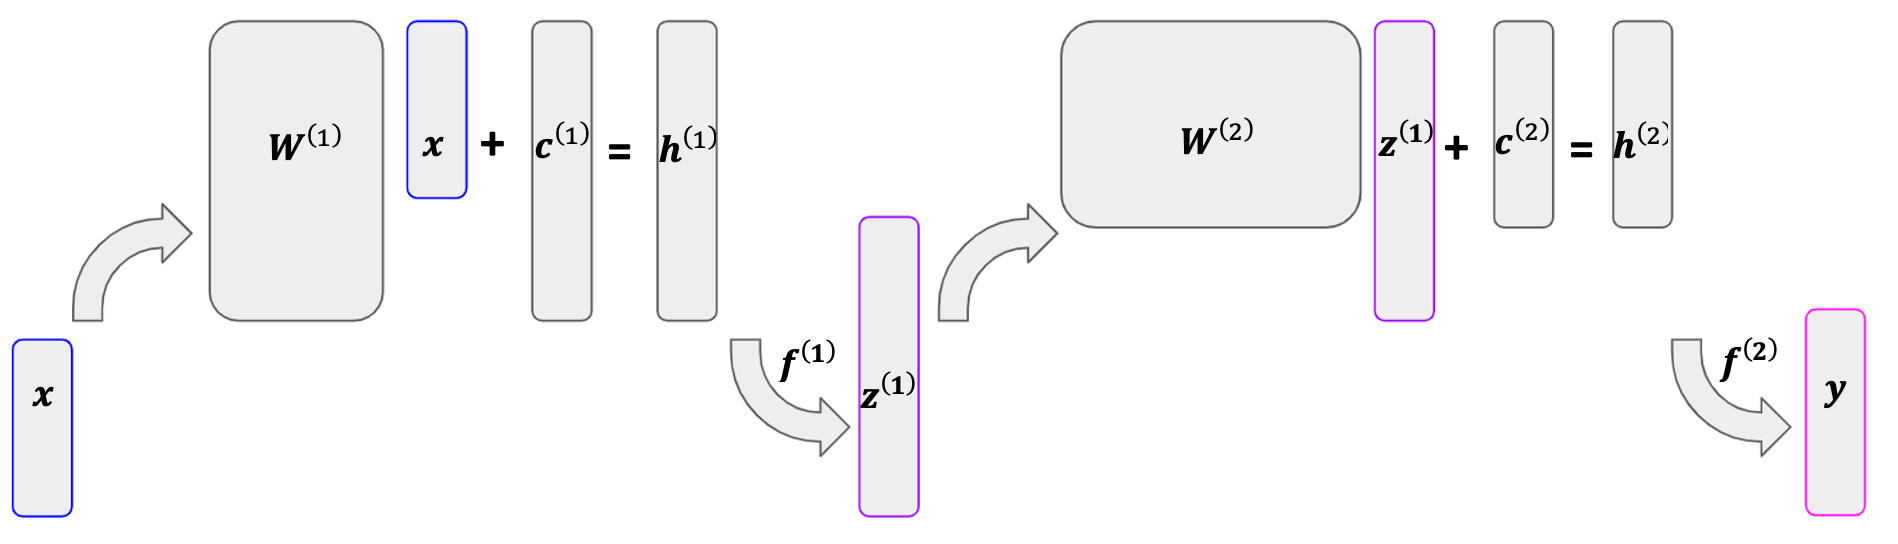

In [8]:
class FeedForwardNeuralNetwork:
    
    def fit(self, X, y, n_hidden, f1 = 'ReLU', f2 = 'linear', loss = 'RSS', lr = 1e-5, n_iter = 1e3, seed = None):
        
        ## Store Information
        self.X = X
        self.y = y.reshape(len(y), -1)
        self.N = len(X)
        self.D_X = self.X.shape[1]
        self.D_y = self.y.shape[1]
        self.D_h = n_hidden
        self.f1, self.f2 = f1, f2
        self.loss = loss
        self.lr = lr
        self.n_iter = int(n_iter)
        self.seed = seed
        
        ## Instantiate Weights
        np.random.seed(self.seed)
        self.W1 = np.random.randn(self.D_h, self.D_X)/5
        self.c1 = np.random.randn(self.D_h, 1)/5
        self.W2 = np.random.randn(self.D_y, self.D_h)/5
        self.c2 = np.random.randn(self.D_y, 1)/5
        
        ## Instantiate Outputs
        self.h1 = np.dot(self.W1, self.X.T) + self.c1
        self.z1 = activation_dictionary[f1](self.h1)
        self.h2 = np.dot(self.W2, self.z1) + self.c2
        self.yhat = activation_dictionary[f2](self.h2)
        
        ## Fit Weights
        for iteration in range(self.n_iter):
            
            dL_dW2 = 0
            dL_dc2 = 0
            dL_dW1 = 0
            dL_dc1 = 0
            
            for n in range(self.N):
                
                # dL_dyhat
                if loss == 'RSS':
                    dL_dyhat = -2*(self.y[n] - self.yhat[:,n]).T # (1, D_y)
                elif loss == 'log':
                    dL_dyhat = (-(self.y[n]/self.yhat[:,n]) + (1-self.y[n])/(1-self.yhat[:,n])).T # (1, D_y)
                
        
                ## LAYER 2 ## 
                # dyhat_dh2 
                if f2 == 'linear':
                    dyhat_dh2 = np.eye(self.D_y) # (D_y, D_y)
                elif f2 == 'sigmoid':
                    dyhat_dh2 = np.diag(sigmoid(self.h2[:,n])*(1-sigmoid(self.h2[:,n]))) # (D_y, D_y)
                    
                # dh2_dc2
                dh2_dc2 = np.eye(self.D_y) # (D_y, D_y)
                
                # dh2_dW2 
                dh2_dW2 = np.zeros((self.D_y, self.D_y, self.D_h)) # (D_y, (D_y, D_h)) 
                for i in range(self.D_y):
                    dh2_dW2[i] = self.z1[:,n] 
                
                # dh2_dz1
                dh2_dz1 = self.W2 # (D_y, D_h)
                
                
                ## LAYER 1 ##
                # dz1_dh1
                if f1 == 'ReLU':
                    dz1_dh1 = 1*np.diag(self.h1[:,n] > 0) # (D_h, D_h)                
                elif f1 == 'linear':
                    dz1_dh1 = np.eye(self.D_h) # (D_h, D_h)

                
                # dh1_dc1 
                dh1_dc1 = np.eye(self.D_h) # (D_h, D_h)
                
                # dh1_dW1
                dh1_dW1 = np.zeros((self.D_h, self.D_h, self.D_X)) # (D_h, (D_h, D_X))
                for i in range(self.D_h):
                    dh1_dW1[i] = self.X[n]
                
                
                ## DERIVATIVES W.R.T. LOSS ## 
                dL_dh2 = dL_dyhat @ dyhat_dh2
                dL_dW2 += dL_dh2 @ dh2_dW2
                dL_dc2 += dL_dh2 @ dh2_dc2
                dL_dh1 = dL_dh2 @ dh2_dz1 @ dz1_dh1
                dL_dW1 += dL_dh1 @ dh1_dW1
                dL_dc1 += dL_dh1 @ dh1_dc1
            
            ## Update Weights
            self.W1 -= self.lr * dL_dW1
            self.c1 -= self.lr * dL_dc1.reshape(-1, 1)           
            self.W2 -= self.lr * dL_dW2            
            self.c2 -= self.lr * dL_dc2.reshape(-1, 1)                    
            
            ## Update Outputs
            self.h1 = np.dot(self.W1, self.X.T) + self.c1
            self.z1 = activation_dictionary[f1](self.h1)
            self.h2 = np.dot(self.W2, self.z1) + self.c2
            self.yhat = activation_dictionary[f2](self.h2)
       

    def predict(self, X_test):
      self.h1 = np.dot(self.W1, X_test.T) + self.c1
      self.z1 = activation_dictionary[self.f1](self.h1)
      self.h2 = np.dot(self.W2, self.z1) + self.c2
      self.yhat = activation_dictionary[self.f2](self.h2)        
      return self.yhat
 
        
     




# **Housing Buston Dataset**

Let's try to build a network with this class using the boston housing data
this network will contain 8 neurons(units) in its hidden layer 

In [17]:
from sklearn.datasets import load_boston
X_boston=load_boston().data
Y_boston=load_boston().target

**Let's split our data to avoid data leakage**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


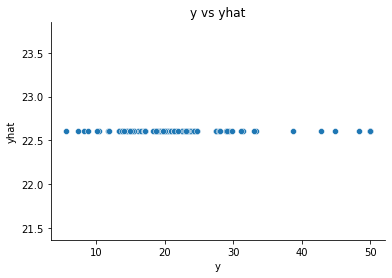

In [12]:
from sklearn.model_selection import train_test_split
x_boston_train,x_boston_test,y_boston_train,y_boston_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#Instance our network
FFNN=FeedForwardNeuralNetwork()
#Fit it
FFNN.fit(x_boston_train,y_boston_train,n_hidden=8)
#Predict
yhat=FFNN.predict(x_boston_test)

fig,ax=plt.subplots()
sns.scatterplot(y_test,yhat[0])
ax.set(xlabel='y',ylabel='yhat',title='y vs yhat')
sns.despine()



**The mean squarred error**

In [14]:
from sklearn.metrics import mean_squared_error
print('the mean squared error:{}'.format(mean_squared_error(y_boston_test,yhat[0])))

the mean squared error:81.57699504323507


# **Breast Cancer Dataset**

In [18]:
from sklearn.datasets import load_breast_cancer
X_breast_cancer=load_breast_cancer().data
Y_breast_cancer=load_breast_cancer().target
x_cancer_train,x_cancer_test,y_cancer_train,y_cancer_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#Instanciate our network 
FFNN=FeedForwardNeuralNetwork()

#Fit it 
FFNN.fit(x_cancer_train,y_cancer_train,n_hidden=8,loss='log',f2='sigmoid',seed=123,lr=1e-4)

#Let's predict 
yhat=FFNN.predict(x_cancer_test)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in matmul


# **Let's make the calculation more faster using tensors**

In [63]:
class FeedForwardNeuralNetwork:
    
    
    def fit(self, X, Y, n_hidden, f1 = 'ReLU', f2 = 'linear', loss = 'RSS', lr = 1e-5, n_iter = 5e3, seed = None):
        
        ## Store Information
        self.X = X
        self.Y = Y.reshape(len(Y), -1)
        self.N = len(X)
        self.D_X = self.X.shape[1]
        self.D_Y = self.Y.shape[1]
        self.Xt = self.X.T
        self.Yt = self.Y.T
        self.D_h = n_hidden
        self.f1, self.f2 = f1, f2
        self.loss = loss
        self.lr = lr
        self.n_iter = int(n_iter)
        self.seed = seed
        
        ## Instantiate Weights
        np.random.seed(self.seed)
        self.W1 = np.random.randn(self.D_h, self.D_X)/5
        self.c1 = np.random.randn(self.D_h, 1)/5
        self.W2 = np.random.randn(self.D_Y, self.D_h)/5
        self.c2 = np.random.randn(self.D_Y, 1)/5
        
        ## Instantiate Outputs
        self.H1 = (self.W1 @ self.Xt) + self.c1
        self.Z1 = activation_function_dict[self.f1](self.H1)
        self.H2 = (self.W2 @ self.Z1) + self.c2
        self.Yhatt = activation_function_dict[self.f2](self.H2)
        
        ## Fit Weights
        for iteration in range(self.n_iter):
            
            # Yhat #
            if self.loss == 'RSS':
                self.dL_dYhatt = -(self.Yt - self.Yhatt) # (D_Y x N)
            elif self.loss == 'log':
                self.dL_dYhatt = (-(self.Yt/self.Yhatt) + (1-self.Yt)/(1-self.Yhatt)) # (D_y x N)
            
            # H2 #
            if self.f2 == 'linear':
                self.dYhatt_dH2 = np.ones((self.D_Y, self.N))
            elif self.f2 == 'sigmoid':
                self.dYhatt_dH2 = sigmoid(self.H2) * (1- sigmoid(self.H2))
            self.dL_dH2 = self.dL_dYhatt * self.dYhatt_dH2 # (D_Y x N)

            # c2 # 
            self.dL_dc2 = np.sum(self.dL_dH2, 1) # (D_y)
            
            # W2 # 
            self.dL_dW2 = np.tensordot(self.dL_dH2, self.Z1, (1,1)) # (D_Y x D_h)
            
            # Z1 #
            self.dL_dZ1 = np.tensordot(self.W2, self.dL_dH2, (0, 0)) # (D_h x N)
            
            # H1 #
            if self.f1 == 'ReLU':
                self.dL_dH1 = self.dL_dZ1 * np.maximum(self.H1, 0) # (D_h x N)
            elif self.f1 == 'linear':
                self.dL_dH1 = self.dL_dZ1 # (D_h x N)
            
            # c1 #
            self.dL_dc1 = np.sum(self.dL_dH1, 1) # (D_h)
            
            # W1 # 
            self.dL_dW1 = np.tensordot(self.dL_dH1, self.Xt, (1,1)) # (D_h, D_X)
            
            ## Update Weights
            self.W1 -= self.lr * self.dL_dW1
            self.c1 -= self.lr * self.dL_dc1.reshape(-1, 1)           
            self.W2 -= self.lr * self.dL_dW2            
            self.c2 -= self.lr * self.dL_dc2.reshape(-1, 1)                    
            
            ## Update Outputs
            self.H1 = (self.W1 @ self.Xt) + self.c1
            self.Z1 = activation_function_dict[self.f1](self.H1)
            self.H2 = (self.W2 @ self.Z1) + self.c2
            self.Yhatt = activation_function_dict[self.f2](self.H2)  
            
    def predict(self, X_test):
        X_testt = X_test.T
        self.h1 = (self.W1 @ X_testt) + self.c1
        self.z1 = activation_function_dict[self.f1](self.h1)
        self.h2 = (self.W2 @ self.z1) + self.c2
        self.Yhatt = activation_function_dict[self.f2](self.h2)        
        return self.Yhatt

# **Implementation**

In [16]:
import tensorflow as tf
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
#Instanciate the model
model=tf.keras.models.Sequential()

#Let's add Layers 
model.add(tf.keras.layers.Dense(units=8,activation='relu',input_shape=(X_boston.shape[1],),name='hidden'))
model.add(tf.keras.layers.Dense(units=1,activation='linear',name='output'))

#Let's compile out model
model.compile(optimizer='adam',loss='mse')
#Let's summarize our model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 8)                 112       
_________________________________________________________________
output (Dense)               (None, 1)                 9         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [21]:
#Let's fit our model , and we should define the epochs and the Batch size,validation size
model.fit(X_boston,Y_boston,epochs=100,batch_size=1,validation_split=0.2,verbose=0)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


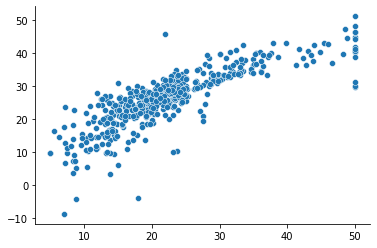

In [23]:
#Let's predict
yhat_boston=model.predict(X_boston)[:,0]
fig, ax = plt.subplots()
sns.scatterplot(Y_boston, yhat_boston)
sns.despine()


In [25]:
from sklearn.metrics import mean_squared_error
print('the mean squared error:{}'.format(mean_squared_error(Y_boston,yhat_boston)))

the mean squared error:42.57954713676986
